<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We aim to predict House Prices (Response) using the the given predictors by regression Sales Prices on the Predictors.<br>
We choose use Lasso Regression after extensive data preprocessing and exploratory data analysis due to multicollinearity present in the dataset.

### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso ,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Data Analysis

### Reading Data

In [ ]:
df = pd.read_csv(r'.\house-prices-advanced-regression-techniques\train.csv')

In [ ]:
df.shape

(1460, 81)

Dataset seems to have high number of predictors.

In [ ]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The meaning of these columns are given in the data_description.txt file.

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


The dataset contains numerous numerical and categorical features some of which are ordinal in numerical form.

Dropping ID as it is just an index and not use full in predicting Price.

In [ ]:
df.drop('Id', axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Segregating Numerical and Categorical Columns

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

print("Number of categorical columns:", num_categorical_features)
print("Number of numerical columns:", num_numerical_features)

Number of categorical columns: 43
Number of numerical columns: 37


## Finding Relationships

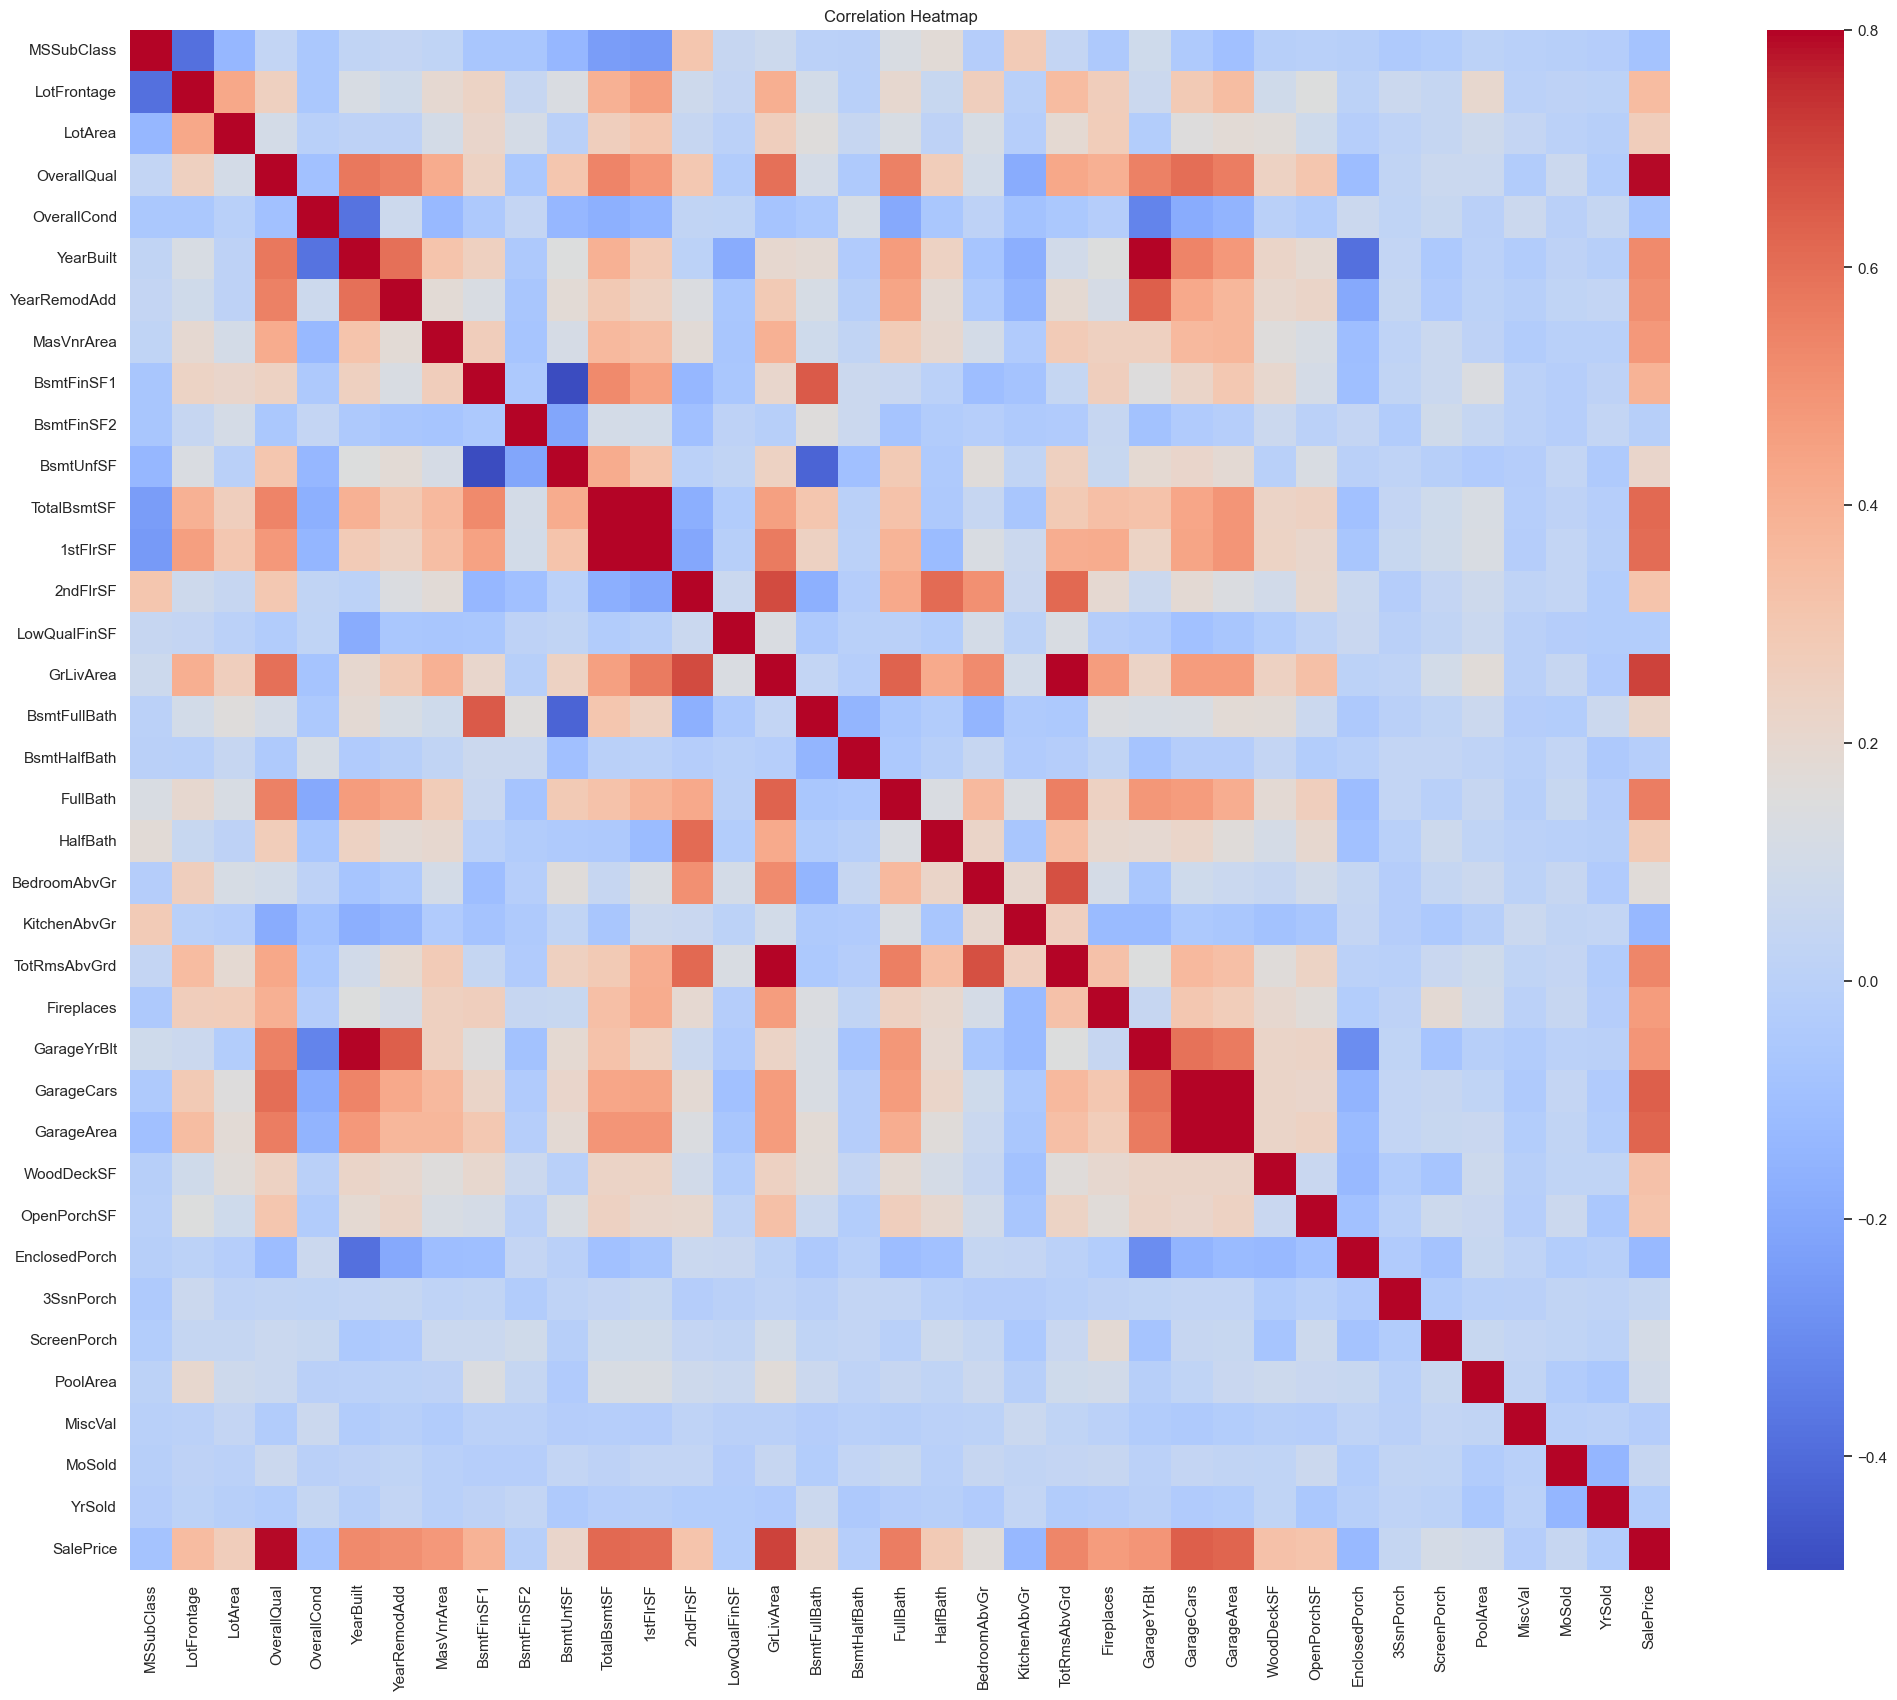

In [ ]:
corrmat = df[numerical_features].corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We can observe a few interesting relationships using the heatmaps.<br>
* OverallQuality of the House seems to have the greated positive correlation with the Sales Prices of the house. <br>
* GrLivArea: Above grade (ground) living area square feet also seems to have a stark effect. Which is in turn collinear with Total Rooms above ground. <br>
* Garage Year Built is also correlated with House Year Built which is obviously true. Plus the later the house was built the more Garage Area and Cars it tends to have.<br>
* Houses when remodelling also tend to add more garage space.
* The later the house was built the lesser number of Enclosed Porches they have.<br>
* Features like GarageCars, GarageArea, GarageYrBlt seem to show multicollinearity so some of them can be dropped as all convey the same relationship. <br>
* OverallQuality can also be determined with many predictors like Garages, Fireplaces, Rooms Above Ground, Full Bath, Ground Living Area, Basement Area also Year Built


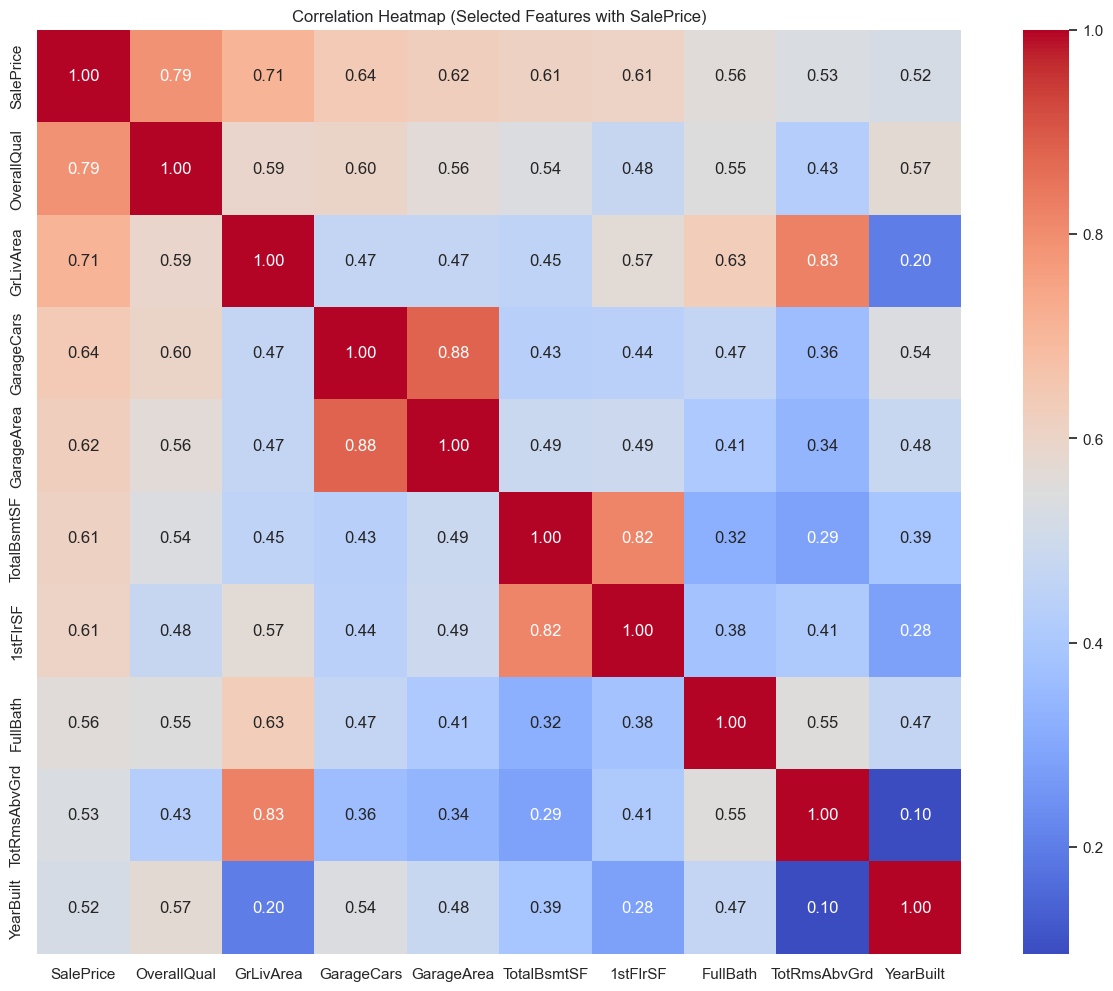

In [ ]:
k = 10
positive_corr_features = corrmat['SalePrice'].sort_values(ascending=False).head(k).index.tolist()
corr_subset = corrmat.loc[positive_corr_features, positive_corr_features]
plt.figure(figsize=(16, 12))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Selected Features with SalePrice)')
plt.show()

The above plot shows the heatmap for features with sorted highest positive correlation in relation to SalePrice.<br>
* We can see multicollinearity among the variables and thus feature selection must be done.
* Basement Variables are obviously correlated.
* Area above ground related with roomes above ground.
* Some features must be dropped.
* Homes with greater living area also have higher number of full bath.

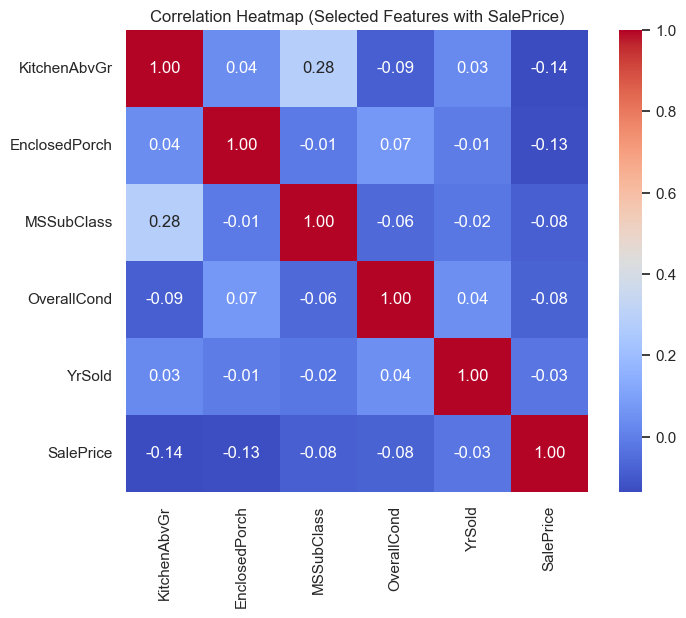

In [ ]:
k = 5
negative_corr_features = corrmat['SalePrice'].sort_values().head(k).index.tolist()
corr_subset = corrmat.loc[negative_corr_features + ['SalePrice'], negative_corr_features + ['SalePrice']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Selected Features with SalePrice)')
plt.show()

No interesting relationship can be deduced as hte values aren't that significant.


We have subjectively selected a few variables that are correlated with SalePrice.

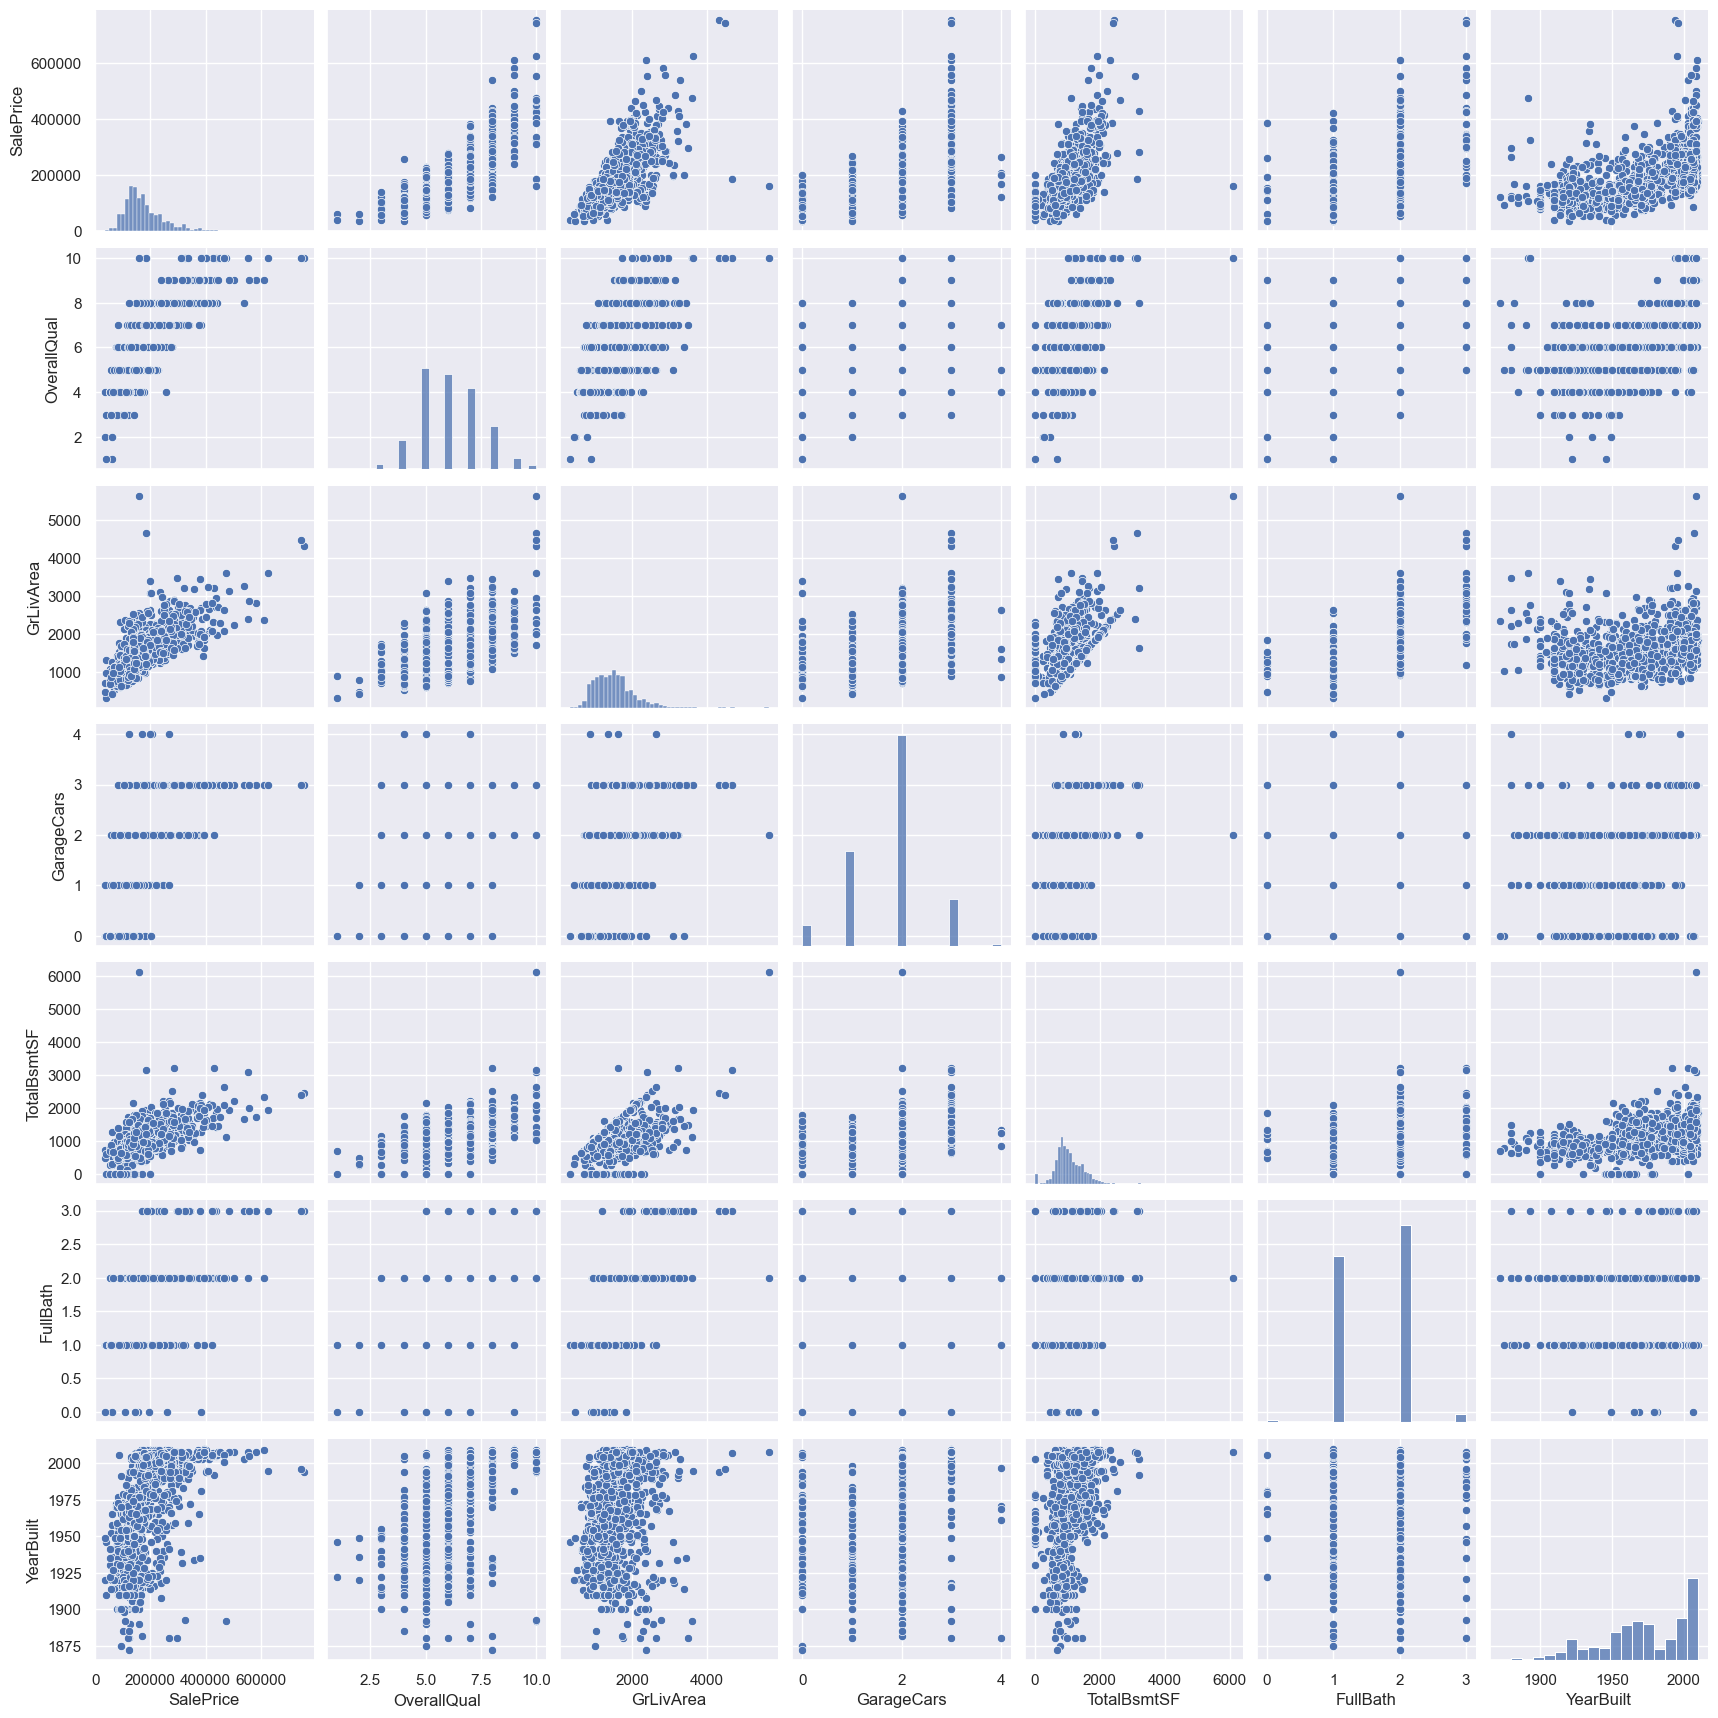

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

* We can clear relationships between SalePrice and various Predictors.
* Plot for SalePrice shows non-constant variance of SalePrice and GrLivArea known as heteroscedasticity.
* The frequency plot for YearBuilt shows that many more homes have been built int he recent years and that the newer homes tend to have higher prices.

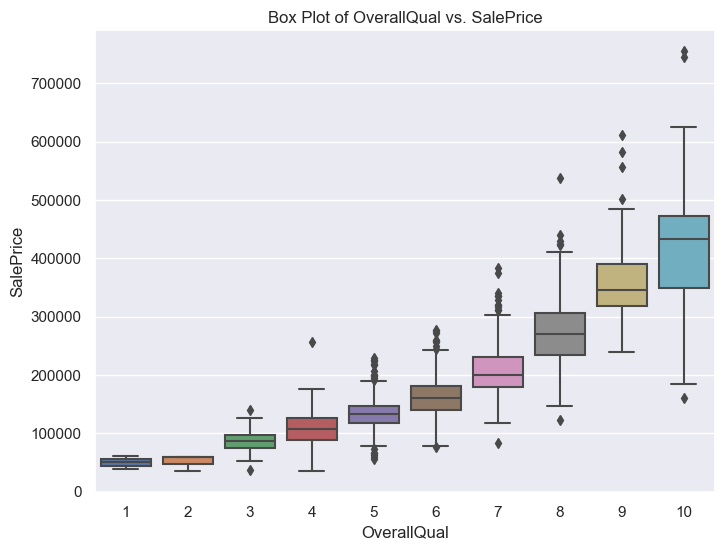

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Box Plot of OverallQual vs. SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

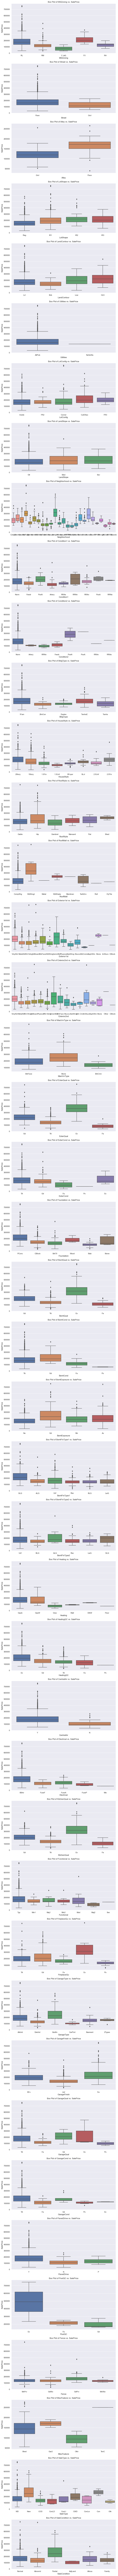

In [ ]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 5 * len(categorical_features)))
for i, col in enumerate(categorical_features):
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} vs. SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

Some interesting relationships:
* We can see how zoning laws affect SalePrice, we see that Floating Village Residential, Residential Low Density have high prices whereas Commerical zones have low house prices.
* Houses with paved roads/alleys have higher Price than those with Gravel Roads/alleys.
* Lot Shape, Config, Contour, Config, Slope shape does have any significant impact.
* Neighborhood seems to have a significant impact on Price.
* Houses next to high speed roads have a lower mean Price than Normal whereas houses next to parks, greenbelt or stations have higher prices.
* Single family housing units fetch the highest price.
* Two stories houses have the highest prices and where the second floor is unfinished have the lowest price.
* As the exterior, basement, kitchen, fireplace, garage, pool quality rises the Price also rises or when the house has central air conditioning.
* Many features don't seem to have proper data and must have high missing values.

Multicollinearity must be accounted for when performing regression as they can affect the accuracy of the coeffients of the features.<br>
Since it can be difcult to separate out the individual efects of collinear variables on the response.

# Feature Engineering

## Missing values detection and removal

### Dropping and mode imputing missing values

Number of columns dropped:  17
Index(['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


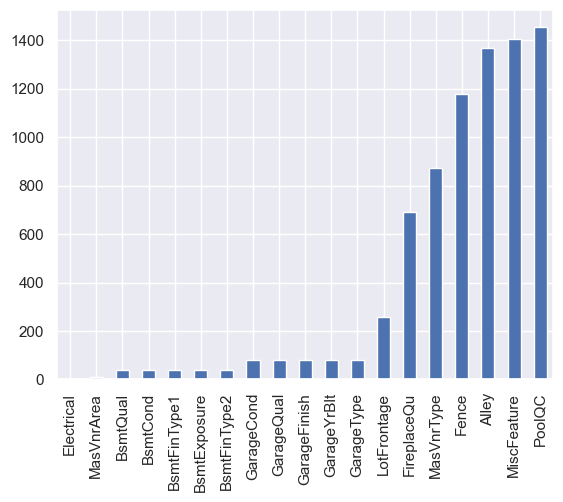

In [ ]:

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing_percentage = (df.isnull().sum() / len(df)) * 100


percent_missing = 2
columns_to_drop = missing_percentage[missing_percentage > percent_missing].index
print('Number of columns dropped: ', len(columns_to_drop))
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)

columns_to_impute = df.columns[df.isnull().any()]
for column in columns_to_impute:
    mode_value = df[column].mode().values[0]
    df[column].fillna(mode_value, inplace=True)

#### Resegregating Numerical and Categorical Columns after Dropping

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

print("Number of categorical columns:", num_categorical_features)
print("Number of numerical columns:", num_numerical_features)

Number of categorical columns: 28
Number of numerical columns: 35


<Axes: xlabel='SalePrice', ylabel='Density'>

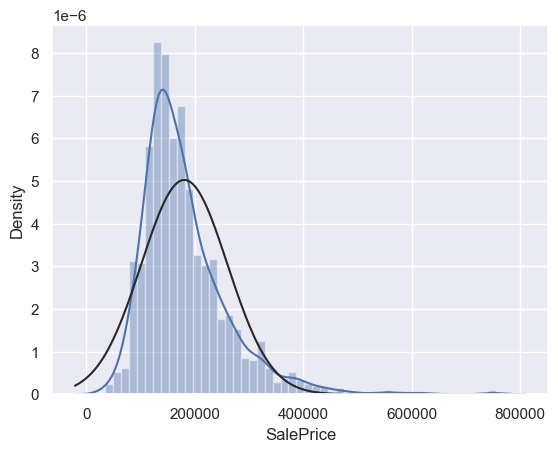

In [ ]:
sns.distplot(df['SalePrice'], fit=norm)

The response is heavily skewed to the right.<br>
In this case using Log transform might help in shrinking extreme values and normalizing the dataset.

## Outlier Detection and Removal

We use z-score deviation to dectect and remove outliers form the dataset.

In [ ]:
z_scores = np.abs((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std())
threshold = 3
outlier_rows = z_scores > threshold
outlier_rows = z_scores > threshold
df.drop(df[outlier_rows.any(axis=1)].index, inplace=True)

In [ ]:
df.shape

(1024, 63)

Checking the distribution of numerical features

<Axes: xlabel='SalePrice', ylabel='Density'>

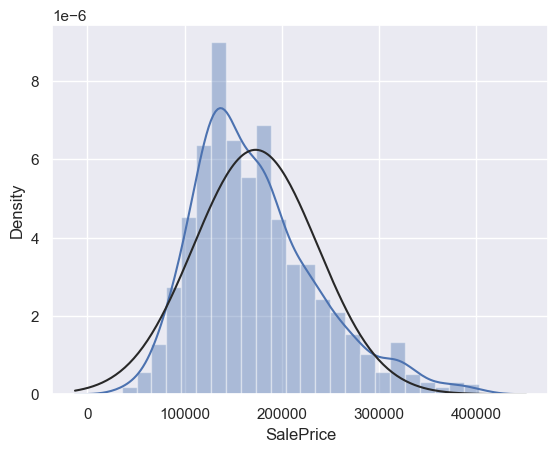

In [ ]:
sns.distplot(df['SalePrice'], fit=norm)

Much closer to standard normal distribution now.

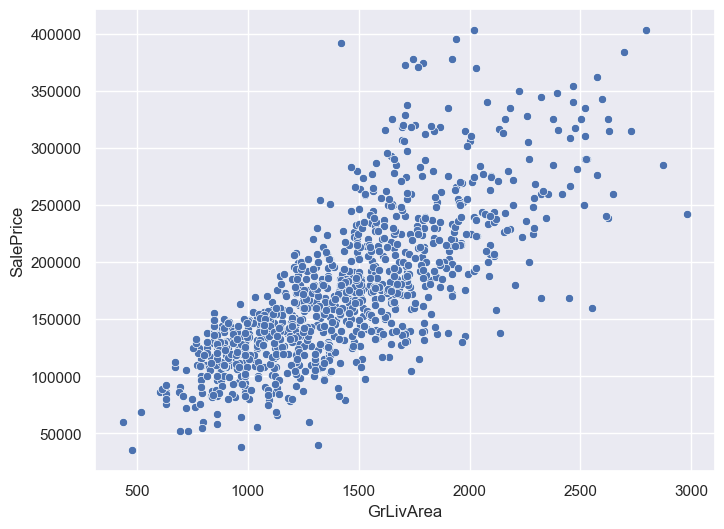

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

By removing the outliers we also were able to remove the non-constant variance of the response seen earlier.

## Collinearity in Predictors

In [ ]:
numerical_features_df = df.select_dtypes(include=['float64', 'int64'])
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features_df.values, i) for i in range(numerical_features_df.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

          Feature           VIF
7      BsmtFinSF1           inf
8      BsmtFinSF2           inf
9       BsmtUnfSF           inf
10    TotalBsmtSF           inf
11       1stFlrSF           inf
12       2ndFlrSF           inf
13   LowQualFinSF           inf
14      GrLivArea           inf
20   KitchenAbvGr  2.396555e+06
34      SalePrice  8.739289e+00
23     GarageCars  5.546958e+00
4       YearBuilt  5.104789e+00
24     GarageArea  4.952859e+00
21   TotRmsAbvGrd  4.321417e+00
2     OverallQual  3.896346e+00
17       FullBath  3.173285e+00
5    YearRemodAdd  2.633764e+00
18       HalfBath  2.557963e+00
19   BedroomAbvGr  2.491412e+00
15   BsmtFullBath  2.211561e+00
0      MSSubClass  2.076090e+00
1         LotArea  1.858406e+00
3     OverallCond  1.592096e+00
22     Fireplaces  1.470492e+00
6      MasVnrArea  1.330731e+00
26    OpenPorchSF  1.311824e+00
27  EnclosedPorch  1.308312e+00
25     WoodDeckSF  1.176030e+00
32         MoSold  1.073636e+00
33         YrSold  1.068108e+00
31      

We still see high multi collinearity in Variables Related to Basement, Kitchen area and Ground Floor Area. <br>
Since we saw earlier that all these are correlated with Ground Area we can remove the rest without loosing any significant information.

We see that we still have quite high multicollinearity.<br>
To handle this we decided to use the regularization technique Lasso Regression.<br>
Lasso regression is effective at addressing multicollinearity. It tends to select one variable from a group of highly correlated variables and sets the coefficients of the others to zero.
This does feature selection and removes redundant features.

### Feature Selection

In numerical predictors we analysed above using the correlation heatmaps and scatterplots, we chose to select only the predictors which show the most amount of correlation with our response. <br>
This is because of other predictors are mostly collinear these few so we aren't loosing any crucial data and only removing the redundant columns.

In [ ]:
columns_to_drop = [col for col in df.select_dtypes(include=['number']).columns if col not in positive_corr_features]
df = df.drop(columns=columns_to_drop)
columns_to_drop


['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Encoding Categorical Factors

In [ ]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Regression

## Splitting the dataset into testing and training for model validation

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

We do this to train and test predictors so that large values don't disproportionately affect the model

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter tuning

Finding the best aplha value using 5-fold cross validation.

In [ ]:
alphas = np.linspace(0.1, 400.0, 2000)
lasso_cv = LassoCV(alphas=alphas, cv=10)

lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_

## Fitting our Model

using the best aplha value found.

In [ ]:
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best Alpha: 300.9752376188094
Mean Squared Error (MSE): 450745759.83229536
R-squared (R2): 0.8926704662545796


We achive a R2 score of 89%

### Visualising Results

Showing which predictor has the greatest affect on the SalesPrice

Text(0.5, 1.0, 'Coefficients in the Model')

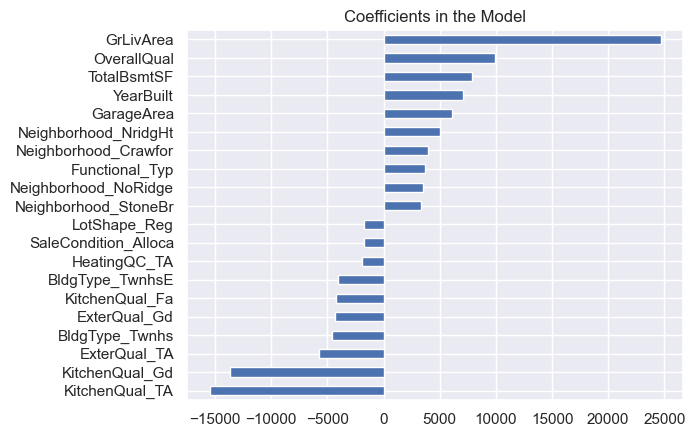

In [ ]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

It seems like according to the model predictors:
* living Area of the House, Garage Area and the outdoor lot area,
* the year it was built as in the newer homes then to have higher prices,
* overall Quality and condition of the house,
* the presence of Bathrooms in Basement,
* being present in a specific neighbourhoods,
then to have a great affect on the house prices.

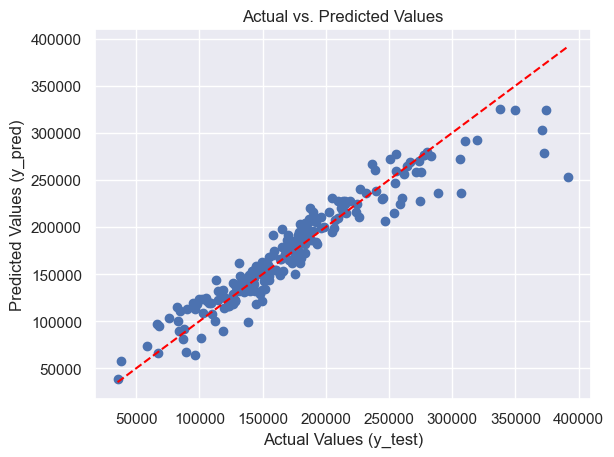

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.show()

The predicted values mostly lie around the dotted line.

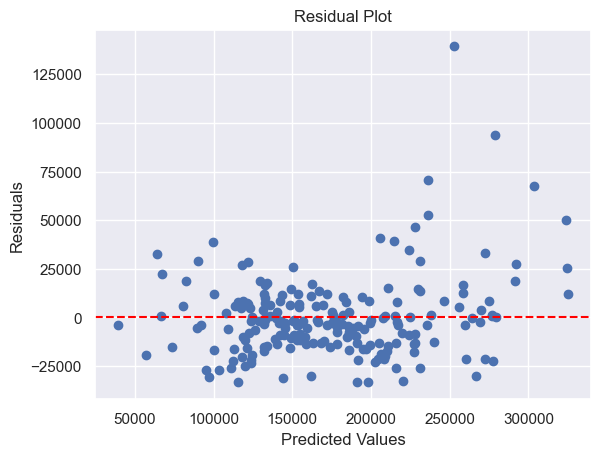

In [ ]:
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The residual plot shows no pattern, which suggests that the data is indeed linear but there are still some outliars in the data.